In [1]:
# 📌 Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 # 📂 Step 2: Extract Zip Dataset (adjust path if needed)
import zipfile
import os

zip_path = '/content/drive/MyDrive/archive.zip'  # Update with your zip file path
extract_path = '/content/fruits_data'  # Temporary extract location

# Remove previous extraction if exists
!rm -rf /content/fruits_data

# Extract zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
# 🔍 Step 3: Check extracted folder structure
for root, dirs, files in os.walk(extract_path):
    print("🔍 Root:", root)
    for name in dirs:
        print("📁", name)
    for name in files:
        print("📄", name)
    break  # remove this to go deeper if needed

🔍 Root: /content/fruits_data
📁 Dataset


In [4]:
# ✅ Step 4: Set dataset directories
# Adjust based on folder structure inside zip
train_dir = os.path.join(extract_path, '/content/fruits_data/Dataset/Visual_Dataset/Train')  # change if needed
val_dir = os.path.join(extract_path, '/content/fruits_data/Dataset/Visual_Dataset/Test')     # change if needed

In [5]:
# 📦 Step 5: Import Required Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# ⚙ Step 5.1: Data Preprocessing
img_size = 224
batch_size = 32

train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=20,
                               zoom_range=0.2,
                               horizontal_flip=True)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir,
                                           target_size=(img_size, img_size),
                                           batch_size=batch_size,
                                           class_mode='categorical')
val_data = val_gen.flow_from_directory(val_dir,
                                       target_size=(img_size, img_size),
                                       batch_size=batch_size,
                                       class_mode='categorical')

Found 8372 images belonging to 10 classes.
Found 2385 images belonging to 10 classes.


In [7]:

# 🧠 Step 6: Load MobileNetV2 + Build Model
base_model = MobileNetV2(include_top=False, input_shape=(img_size, img_size, 3), weights='imagenet')
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:

# 🚀 Step 7: Train the Model
history = model.fit(train_data, epochs=5, validation_data=val_data)


Epoch 1/5
262/262 ━━━━━━━━━━━━━━━━━━━━ 509s 2s/step - accuracy: 0.9758 - loss: 0.0706 - val_accuracy: 0.9325 - val_loss: 0.2106
Epoch 2/5
262/262 ━━━━━━━━━━━━━━━━━━━━ 501s 2s/step - accuracy: 0.9752 - loss: 0.0729 - val_accuracy: 0.8994 - val_loss: 0.3119
Epoch 3/5
262/262 ━━━━━━━━━━━━━━━━━━━━ 550s 2s/step - accuracy: 0.9764 - loss: 0.0675 - val_accuracy: 0.9434 - val_loss: 0.1942
Epoch 4/5
262/262 ━━━━━━━━━━━━━━━━━━━━ 550s 2s/step - accuracy: 0.9761 - loss: 0.0672 - val_accuracy: 0.9421 - val_loss: 0.1881
Epoch 5/5
262/262 ━━━━━━━━━━━━━━━━━━━━ 551s 2s/step - accuracy: 0.9763 - loss: 0.0706 - val_accuracy: 0.9585 - val_loss: 0.1492


In [19]:
# 💾 Step 8: Save the Model
model_path = '/content/drive/MyDrive/smart_sorting_model.h5'
model.save(model_path)
print(f"✅ Model saved at: {model_path}")


✅ Model saved at: /content/drive/MyDrive/smart_sorting_model.h5


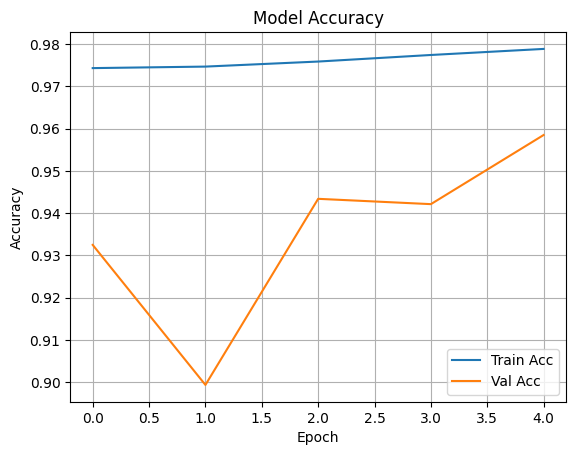

In [20]:
# 📊 Step 9: Plot Training History
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Saving pic2.jpg to pic2 (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step

🧠 Predicted: FreshApple


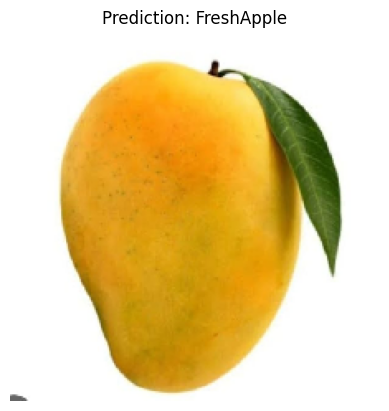

In [31]:
# 🔍 Step 10: Upload & Predict a Single Image
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

def predict_image(img_path, model, class_indices):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = list(class_indices.keys())[np.argmax(prediction)]
    print(f"\n🧠 Predicted: {predicted_class}")

    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}")
    plt.axis('off')
    plt.show()

predict_image(img_path, model, train_data.class_indices)
